In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from download_climate_data import download_data
import os
import datetime

We are only interested in sensors with the following parameters: (sensor_name = sds011, sensor_id = 6127) and (sensor_name = bme280, sensor_id = 6128).

In [2]:
def part_day(x):
    """ Returns part of day based on the timestamp hour """
    x = x.hour
    if (x > 4) and (x <= 8):
        return 1
    elif (x > 8) and (x <= 12):
        return 2
    elif (x > 12) and (x <= 14):
        return 3
    elif (x > 14) and (x <= 18):
        return 4
    elif (x > 18) and (x <= 22):
        return 5
    else:
        return 6

In [3]:
def season(x):
    """Returns season based on month"""
    x = x.month
    if (x > 3) and (x <= 6):
        return 1
    elif (x > 6) and (x <= 9):
        return 2
    elif (x > 9) and (x <= 11):
        return 3
    else:
        return 4

In [4]:
def is_workday(x):
    """ Returns if day is workday"""
    if x <= 4:
        return 1
    else:
        return 0

In [5]:
def mean_print_plot(df, category: str, data_col1: str, data_col2: str) -> None:
    """Function which prints the mean of each category in a data column and plots the difference between the 2 datasets
    
    Parameters: 
    df: data frame
    category: category name
    data_col1: data to calculate mean on
    data_col2: data to calculate mean on
    
    Returns: 
    None
    
    """
    
    print(f"P1 data stats: {df.groupby([category]).mean()[data_col1].sort_index()}")
    print('------------------------------------------------')
    print(f"P2 data stats: {df.groupby([category]).mean()[data_col2].sort_index()}")
    
    plt.plot(df.groupby([category]).mean()[data_col1].sort_index(), label='P1')
    plt.plot(df.groupby([category]).mean()[data_col2].sort_index(), label='P2')
    plt.title(f'Mean of {data_col1} and {data_col2} per {category} category')
    plt.legend()
    plt.grid()

In [6]:
def is_p1_high(x):
    if x > 35:
        return 1
    else:
        return 0

In [7]:
def is_holiday(x):
    """ Returns if it is holiday if date is 3 days around a holiday"""
    for holiday in HOLIDAYS:
        if (x >= holiday-datetime.timedelta(days=3)) and (x <= holiday + datetime.timedelta(days=3)):
            return 1
        else:
            return 0

Also, we are going to create a list with all public holidays:  
Date	Holiday	Official Name  
1 January	New Year's Day   
3 March	Liberation Day  
1 May	International Workers' Day  
6 May	Saint George's Day  
24 May	Bulgarian Education and Culture and Slavonic Literature Day  
6 September	Unification Day  
22 September	Independence Day  
24 December	Christmas Eve  
25 & 26 December	Christmas Day  
Moveable	Orthodox Good Friday, Holy Saturday & Easter  

In [8]:
HOLIDAYS = [datetime.date(2020,4,19), datetime.date(2021,1,1), datetime.date(2021,3,3),datetime.date(2020,5,1),
            datetime.date(2020,5,6),datetime.date(2020,5,24),datetime.date(2020,9,6),
            datetime.date(2020,9,22),datetime.date(2020,12,24),datetime.date(2020,12,25),datetime.date(2020,12,26)]

In [224]:
START_DATE = datetime.date(2020,4,1)   # start time for the analysis

### Data download now

In [225]:
download_data(sensor_name='sds011', sensor_id=6127)
download_data(sensor_name='bme280', sensor_id=6128)

Downloading: 2020-04-01
Downloading: 2020-04-02
Downloading: 2020-04-03
Downloading: 2020-04-04
Downloading: 2020-04-05
Downloading: 2020-04-06
Downloading: 2020-04-07
Downloading: 2020-04-08
Downloading: 2020-04-09
Downloading: 2020-04-10
Downloading: 2020-04-11
Downloading: 2020-04-12
Downloading: 2020-04-13
Downloading: 2020-04-14
Downloading: 2020-04-15
Downloading: 2020-04-16
Downloading: 2020-04-17
Downloading: 2020-04-18
Downloading: 2020-04-19
Downloading: 2020-04-20
Downloading: 2020-04-21
Downloading: 2020-04-22
Downloading: 2020-04-23
Downloading: 2020-04-24
Downloading: 2020-04-25
Downloading: 2020-04-26
Downloading: 2020-04-27
Downloading: 2020-04-28
Downloading: 2020-04-29
Downloading: 2020-04-30
Downloading: 2020-05-01
Downloading: 2020-05-02
Downloading: 2020-05-03
Downloading: 2020-05-04
Downloading: 2020-05-05
Downloading: 2020-05-06
Downloading: 2020-05-07
Downloading: 2020-05-08
Downloading: 2020-05-09
Downloading: 2020-05-10
Downloading: 2020-05-11
Downloading: 202

#### We have all the data, let us now load the data in dataframe

In [11]:
file_list = os.listdir('./data/')

In [12]:
date_list = set([file.split('_')[0] for file in file_list]) # get unique dates

In [13]:
df = pd.DataFrame()

In [25]:
for date in date_list:
    for file in file_list:
        if file.find(date) != -1:
            if file.find('bme280') != -1:
                df_temp_1 = pd.read_csv('./data/'+file, sep=';')
                df_temp_1.timestamp = pd.to_datetime(df_temp_1.timestamp, errors='ignore', infer_datetime_format=True)
            elif file.find('sds011') != -1:
                df_temp_2 = pd.read_csv('./data/'+file, sep=';')
                df_temp_2.timestamp = pd.to_datetime(df_temp_2.timestamp, errors='ignore', infer_datetime_format=True)
            
        df_1 = pd.merge_asof(df_temp_1, df_temp_2, on='timestamp', direction='nearest', tolerance=datetime.timedelta(seconds=20), allow_exact_matches=False)
        df_1.drop(['altitude', 'pressure', 'durP2', 'ratioP2', 'durP1', 'ratioP1', "ratioP2",
                  'sensor_id_x', 'sensor_type_x', 'location_x', 'lat_x', 'lon_x', 'pressure_sealevel',
                  'sensor_id_y', 'sensor_type_y', 'location_y', 'lat_y','lon_y'], axis=1, inplace=True);
        df_1.dropna(inplace=True)
    df = pd.concat([df, df_1])

In [26]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [27]:
df['IsHoliday'] = df['timestamp'].apply(is_holiday) 
df['PartDay'] = df['timestamp'].apply(part_day)

In [28]:
df['WeekDay'] = df['timestamp'].dt.dayofweek

In [29]:
df['IsWorking'] = df['WeekDay'].apply(is_workday)

In [30]:
df['Season'] = df['timestamp'].apply(season)

Check if the P1 and P2 values are higher in any part of the day or if it is a holiday.

P1 data stats: IsHoliday
0    21.902981
1    11.290025
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: IsHoliday
0    10.971089
1     6.689738
Name: P2, dtype: float64


([<matplotlib.axis.XTick at 0x7fb53469bf40>,
 [Text(0.0, 0, 'Normal day'), Text(1.0000000000000002, 0, 'Holiday')])

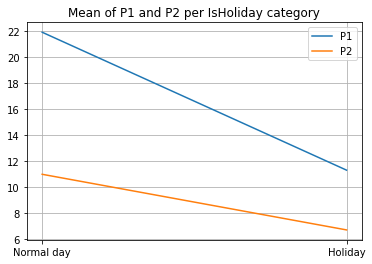

In [163]:
mean_print_plot(df, category='IsHoliday', data_col1='P1', data_col2='P2')
locs, ticks = plt.xticks()
plt.xticks([locs[1], locs[-2]], ['Normal day', 'Holiday'])

P1 data stats: WeekDay
0    20.923175
1    21.798023
2    22.379729
3    19.217035
4    22.818081
5    24.521938
6    20.779478
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: WeekDay
0    10.808763
1    10.862912
2    10.874274
3     9.698477
4    11.364189
5    12.019899
6    10.807247
Name: P2, dtype: float64


([<matplotlib.axis.XTick at 0x7fb702e3f310>,
 [Text(-1.0, 0, ''),
  Text(0.0, 0, 'Mon'),
  Text(1.0, 0, 'Tue'),
  Text(2.0, 0, 'Wed'),
  Text(3.0, 0, 'Thu'),
  Text(4.0, 0, 'Fri'),
  Text(5.0, 0, 'Sat'),
  Text(6.0, 0, 'Sun'),
  Text(7.0, 0, '')])

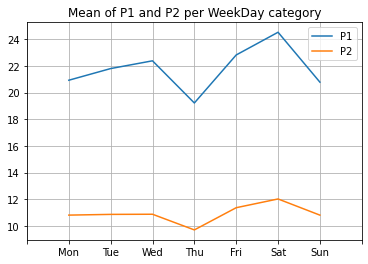

In [157]:
mean_print_plot(df, category='WeekDay', data_col1='P1', data_col2='P2')
locs, ticks = plt.xticks()
plt.xticks(locs, ['', 'Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', ''])

P1 data stats: Season
1    13.689664
2    11.637685
3    24.443991
4    29.279461
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: Season
1     7.241151
2     7.707919
3    11.423877
4    12.849945
Name: P2, dtype: float64


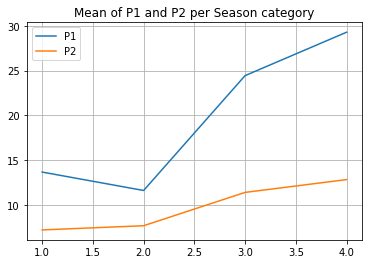

In [230]:
df_blah = df.loc[df['PartDay']==6]
mean_print_plot(df_blah, category='Season', data_col1='P1', data_col2 = 'P2')

P1 data stats: PartDay
1    26.333939
2    17.852379
3    16.090872
4    24.714647
5    23.705592
6    19.640751
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: PartDay
1    12.849758
2     9.692042
3     8.684842
4    12.110483
5    11.617310
6     9.777295
Name: P2, dtype: float64


([<matplotlib.axis.XTick at 0x7fb71796dbb0>,
 [Text(0.0, 0, ' '),
  Text(1.0, 0, 'Early Morning'),
  Text(2.0, 0, 'Morning'),
  Text(3.0, 0, 'Noon'),
  Text(4.0, 0, 'Afternoon'),
  Text(5.0, 0, 'Evening'),
  Text(6.0, 0, 'Night'),
  Text(7.0, 0, '')])

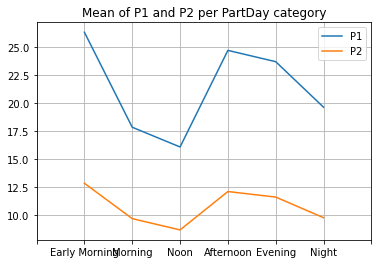

In [155]:
mean_print_plot(df, category='PartDay', data_col1='P1', data_col2='P2')
locs, ticks = plt.xticks()
plt.xticks(locs, [' ','Early Morning', 'Morning', 'Noon', 'Afternoon', 'Evening', 'Night', ''])

array([0., 1., 2., 3., 4., 5., 6., 7.])

P1 data stats: Season
1    13.725050
2    10.960895
3    30.822060
4    33.120027
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: Season
1     7.389153
2     7.603711
3    14.641096
4    14.769914
Name: P2, dtype: float64


([<matplotlib.axis.XTick at 0x7fb7178f03a0>,
 [Text(1.0, 0, 'Spring'),
  Text(2.0, 0, 'Summer'),
  Text(3.0, 0, 'Autumn'),
  Text(4.0, 0, 'Winter')])

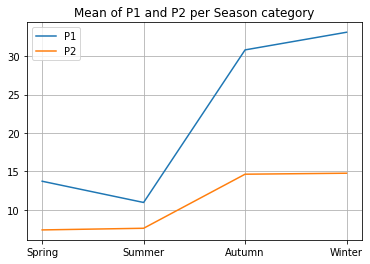

In [160]:
mean_print_plot(df, category='Season', data_col1='P1', data_col2='P2')
locs, ticks = plt.xticks()
plt.xticks(locs[1:-1:2], ['Spring', 'Summer', 'Autumn', 'Winter'])

### As we see there are correlations between the season, week day, time of day and holidays and the air quality. 
##### I will now check with a seaborn correlation plot

<AxesSubplot:>

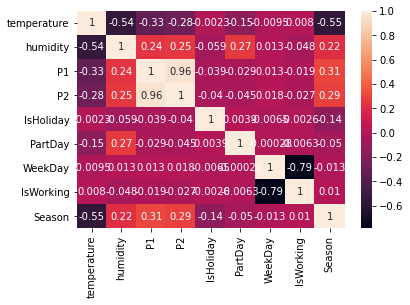

In [35]:
sns.heatmap(df.corr(), annot=True)

Strangly enough there seems to be a correlation also between the humidity and the air quality, but not that much with temperature.

### Regression
##### I think that this problem may be best generalized with a random forest model. First I will start with a regressor, then I will use a classifier

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [143]:
X = df[['temperature', 'humidity', 'IsHoliday', 'WeekDay', 'Season']]
y = df['P1']
today = [12, 47, 0, 1, 1]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [130]:
sc_regr = StandardScaler()
X_train = sc_regr.fit_transform(X_train)
X_test = sc_regr.transform(X_test)


In [144]:
today = sc_regr.transform([today])

In [40]:
regr = RandomForestRegressor()
regr_svm = SVR()

In [41]:
regr.fit(X_train, y_train)
regr_svm.fit(X_train, y_train)

SVR()

In [42]:
regr.predict(today)

array([32.49653])

In [43]:
regr_svm.predict(today)

array([28.02530818])

In [44]:
y_pred_svm = regr_svm.predict(X_test)

Regression ANN:

In [124]:
import tensorflow as tf

In [125]:
ann_regr = tf.keras.models.Sequential()

In [126]:
ann_regr.add(tf.keras.layers.Dense(units = 5, activation='relu'))
ann_regr.add(tf.keras.layers.Dense(units = 8, activation='relu'))
ann_regr.add(tf.keras.layers.Dense(units=1))

In [127]:
ann_regr.compile(optimizer='adam', loss='mean_squared_error')

In [131]:
ann_regr.fit(X, y, batch_size=64, epochs=100)

Epoch 1/100
1600/1600 [==============================] - 2s 1ms/step - loss: 1152.9218
Epoch 2/100
1600/1600 [==============================] - 2s 940us/step - loss: 737.9810
Epoch 3/100
1600/1600 [==============================] - 2s 981us/step - loss: 708.2553
Epoch 4/100
1600/1600 [==============================] - 2s 971us/step - loss: 743.6075
Epoch 5/100
1600/1600 [==============================] - 2s 983us/step - loss: 704.6582
Epoch 6/100
1600/1600 [==============================] - 2s 1ms/step - loss: 724.3096
Epoch 7/100
1600/1600 [==============================] - 2s 1ms/step - loss: 699.7277
Epoch 8/100
1600/1600 [==============================] - 3s 2ms/step - loss: 694.1408
Epoch 9/100
1600/1600 [==============================] - 1s 862us/step - loss: 696.1978
Epoch 10/100
1600/1600 [==============================] - 1s 860us/step - loss: 681.2321
Epoch 11/100
1600/1600 [==============================] - 3s 2ms/step - loss: 731.0869
Epoch 12/100
1600/1600 [===============

1600/1600 [==============================] - 1s 919us/step - loss: 677.5767
Epoch 94/100
1600/1600 [==============================] - 1s 896us/step - loss: 684.7627
Epoch 95/100
1600/1600 [==============================] - 1s 885us/step - loss: 699.6927
Epoch 96/100
1600/1600 [==============================] - 2s 1ms/step - loss: 637.4092
Epoch 97/100
1600/1600 [==============================] - 1s 911us/step - loss: 673.2748
Epoch 98/100
1600/1600 [==============================] - 1s 931us/step - loss: 656.0662
Epoch 99/100
1600/1600 [==============================] - 2s 1ms/step - loss: 663.8746
Epoch 100/100
1600/1600 [==============================] - 2s 958us/step - loss: 685.8145


In [134]:
y_pred = ann_regr.predict(X_test)

In [140]:
print(y_test)

25615     7.60
5399     18.77
996      14.43
22372    21.73
15922    26.40
         ...  
72521    19.93
69082    20.60
38973    90.53
49274    28.90
1818      8.00
Name: P1, Length: 30711, dtype: float64


In [145]:
ann_regr.predict(today)

array([[8.561745]], dtype=float32)

Later training XGBoost

In [45]:
df['HighP1'] = df['P1'].apply(is_p1_high)

### Now I will run a classification RF model

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
y = df['HighP1']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
today = [1, 100, 0, 6, 1]

In [49]:
classifier = RandomForestClassifier()

In [50]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
print(accuracy_score(y_test, y_pred))

0.8889648660089219


In [53]:
print(confusion_matrix(y_test,y_pred))

[[24368  1445]
 [ 1965  2933]]


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     25813
           1       0.67      0.60      0.63      4898

    accuracy                           0.89     30711
   macro avg       0.80      0.77      0.78     30711
weighted avg       0.88      0.89      0.89     30711



In [55]:
classifier.predict_proba([today])
regr.predict([today])

array([23.2853])

In [56]:
regr.feature_importances_

array([5.76733791e-01, 2.21562407e-01, 5.10267119e-04, 1.33888042e-01,
       6.73054924e-02])

In [57]:
classifier.feature_importances_

array([0.56820542, 0.23534327, 0.00113369, 0.07553993, 0.11977769])

Results are not great - this may be due to overfitting of the clean air data as we have roughly 5 times more data for that case

In [58]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [109]:
sc = StandardScaler()

In [60]:
classifier_svc = SVC()

In [110]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
today = sc.transform([today])

In [62]:
classifier_svc.fit(X_train, y_train)

SVC()

In [63]:
y_pred_svc = classifier_svc.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     25813
           1       0.58      0.24      0.34      4898

    accuracy                           0.85     30711
   macro avg       0.72      0.60      0.63     30711
weighted avg       0.82      0.85      0.82     30711



In [65]:
classifier_svc.predict(today)

array([0])

Now I will try with ANN regression/classification

In [66]:
import tensorflow as tf

In [111]:
ann = tf.keras.models.Sequential()

In [112]:
ann.add(tf.keras.layers.Dense(units = 8, activation='relu'))
ann.add(tf.keras.layers.Dense(units = 8, activation='relu'))

In [113]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [115]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [116]:
ann.fit(X_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
1120/1120 [==============================] - 2s 1ms/step - loss: 0.4477 - accuracy: 0.7945: 0s - los
Epoch 2/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3250 - accuracy: 0.8381
Epoch 3/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3170 - accuracy: 0.8465
Epoch 4/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3148 - accuracy: 0.8489
Epoch 5/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3147 - accuracy: 0.8500
Epoch 6/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3144 - accuracy: 0.8496: 0s - loss: 0.314
Epoch 7/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3165 - accuracy: 0.8491
Epoch 8/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3155 - accuracy: 0.8490
Epoch 9/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3134 - accuracy: 0.8484
Epoch 10/100
1120/1120 [=====================

1120/1120 [==============================] - 1s 1ms/step - loss: 0.3043 - accuracy: 0.8496
Epoch 80/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3062 - accuracy: 0.8499
Epoch 81/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3056 - accuracy: 0.8489
Epoch 82/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3029 - accuracy: 0.8510
Epoch 83/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3041 - accuracy: 0.8507
Epoch 84/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3066 - accuracy: 0.8477
Epoch 85/100
1120/1120 [==============================] - 2s 1ms/step - loss: 0.3025 - accuracy: 0.8513
Epoch 86/100
1120/1120 [==============================] - 2s 1ms/step - loss: 0.3027 - accuracy: 0.8503
Epoch 87/100
1120/1120 [==============================] - 1s 1ms/step - loss: 0.3033 - accuracy: 0.8498
Epoch 88/100
1120/1120 [==============================] - 1s 1ms/step - loss:

In [117]:
y_pred = ann.predict(X_test)

In [118]:
ann.predict(today)

array([[0.5626948]], dtype=float32)

In [122]:
y_pred = (y_pred > 0.5)

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     25629
           1       0.55      0.29      0.38      5082

    accuracy                           0.84     30711
   macro avg       0.71      0.62      0.65     30711
weighted avg       0.82      0.84      0.82     30711



array([[0.00494426],
       [0.3015668 ],
       [0.38078123],
       ...,
       [0.32857865],
       [0.36339432],
       [0.00449431]], dtype=float32)